# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.10000000149011612
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.09000000171363354
Score (max over agents) from episode 5: 0.09000000171363354


When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [1]:
import numpy as np
from maddpg_agent import MADDPGAgent
from collections import deque
import matplotlib.pyplot as plt
import torch
from unityagents import UnityEnvironment
from tensorboardX import SummaryWriter

In [2]:
env = UnityEnvironment(file_name='Tennis')
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


In [3]:
state_sizes = []
action_sizes = []
for i in range(num_agents):
    state_sizes.append(state_size)
    action_sizes.append(action_size)

agent = MADDPGAgent(num_agents=num_agents, state_sizes=state_sizes, action_sizes=action_sizes, random_seed=2)

In [4]:
import shutil
import os

log_path = os.getcwd()+"\log"    
print(log_path)
if os.path.exists(log_path):
    shutil.rmtree(log_path)
os.makedirs(log_path, exist_ok=True)

logger = SummaryWriter(log_dir=log_path)

C:\Users\my\Documents\GitHub\maddpg\log


In [5]:
def madddpg_train(n_episodes=5000, max_t=500, print_every=1):

    scores = []
    moving_average = []
    scores_deque = deque(maxlen=100)
        
    np.random.seed(1)
    torch.manual_seed(1)
    
    for i_episode in range(1, n_episodes+1):
    
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations        # current state (for each agent)
        agent_scores = np.zeros(num_agents)          # initialize agents' scores
        agent.reset()                                # reset noise process for action exploration
        
        for t in range(max_t):     
            
            actions = agent.act(states, True)            
            actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished   
            agent.step(states, actions, rewards, next_states, dones, logger) 
            agent_scores += rewards                            # update the score (for each agent)
            states = next_states                               # enter next states            
            if np.any(dones):
                break
        
        scores_deque.append(np.max(agent_scores))
        scores.append(np.max(agent_scores))
        moving_average.append(np.mean(scores_deque))
                
        print('\nEpisode {}\tMax Score: {:.4f}\tSteps: {:.1f}'.format(i_episode, np.max(agent_scores), t), end="")   
        
        logger.add_scalar('mean_episode_rewards', np.mean(agent_scores), i_episode)
        logger.add_scalar('max_episode_rewards', np.max(agent_scores), i_episode)
        logger.add_scalar('num_of_steps_for_episode', t, i_episode)
        logger.add_scalar('moving_average_100_episodes', np.mean(scores_deque), i_episode)
            
        if i_episode % print_every == 0:                          
            print('\rEpisode {}\tMax Score: {:.4f} \tAvg Reward: {:.4f}\tSteps: {:.1f}'.format(i_episode, np.max(agent_scores), np.mean(scores_deque), t), end="")                           
            
        # environment is considered solved if we can mantain an average reward value of +0.5 over 100 consecutive episodes.
        if np.mean(scores_deque) >= 0.5:
            if len(scores_deque) >= 100:
                print('\rEnvironment solved in {:d} episodes!\tAverage Reward: {:.4f}'.format(i_episode, np.mean(scores_deque)))
                agent.save()
                return scores, moving_average 
            
    return scores, moving_average

scores, moving_average = madddpg_train()


Episode 1	Max Score: 0.0000 	Avg Reward: 0.0000	Steps: 14.0
Episode 2	Max Score: 0.0000 	Avg Reward: 0.0000	Steps: 13.0
Episode 3	Max Score: 0.0000 	Avg Reward: 0.0000	Steps: 13.0
Episode 4	Max Score: 0.0000 	Avg Reward: 0.0000	Steps: 13.0
Episode 5	Max Score: 0.0000 	Avg Reward: 0.0000	Steps: 13.0
Episode 6	Max Score: 0.0000 	Avg Reward: 0.0000	Steps: 14.0
Episode 7	Max Score: 0.0000 	Avg Reward: 0.0000	Steps: 13.0
Episode 8	Max Score: 0.1000 	Avg Reward: 0.0125	Steps: 29.0
Episode 9	Max Score: 0.0000 	Avg Reward: 0.0111	Steps: 13.0
Episode 10	Max Score: 0.0000 	Avg Reward: 0.0100	Steps: 14.0
Episode 11	Max Score: 0.0000 	Avg Reward: 0.0091	Steps: 13.0
Episode 12	Max Score: 0.0000 	Avg Reward: 0.0083	Steps: 13.0
Episode 13	Max Score: 0.0000 	Avg Reward: 0.0077	Steps: 13.0
Episode 14	Max Score: 0.1000 	Avg Reward: 0.0143	Steps: 20.0
Episode 15	Max Score: 0.0000 	Avg Reward: 0.0133	Steps: 13.0
Episode 16	Max Score: 0.1000 	Avg Reward: 0.0188	Steps: 20.0
Episode 17	Max Score: 0.0000 	Av

Episode 134	Max Score: 0.0000 	Avg Reward: 0.0151	Steps: 13.0
Episode 135	Max Score: 0.0000 	Avg Reward: 0.0151	Steps: 13.0
Episode 136	Max Score: 0.0000 	Avg Reward: 0.0151	Steps: 13.0
Episode 137	Max Score: 0.0000 	Avg Reward: 0.0151	Steps: 14.0
Episode 138	Max Score: 0.0000 	Avg Reward: 0.0151	Steps: 13.0
Episode 139	Max Score: 0.0000 	Avg Reward: 0.0151	Steps: 13.0
Episode 140	Max Score: 0.0000 	Avg Reward: 0.0151	Steps: 14.0
Episode 141	Max Score: 0.0000 	Avg Reward: 0.0151	Steps: 13.0
Episode 142	Max Score: 0.0000 	Avg Reward: 0.0151	Steps: 13.0
Episode 143	Max Score: 0.0000 	Avg Reward: 0.0141	Steps: 13.0
Episode 144	Max Score: 0.1000 	Avg Reward: 0.0151	Steps: 32.0
Episode 145	Max Score: 0.0000 	Avg Reward: 0.0141	Steps: 13.0
Episode 146	Max Score: 0.0000 	Avg Reward: 0.0141	Steps: 13.0
Episode 147	Max Score: 0.0000 	Avg Reward: 0.0141	Steps: 14.0
Episode 148	Max Score: 0.0000 	Avg Reward: 0.0132	Steps: 13.0
Episode 149	Max Score: 0.0000 	Avg Reward: 0.0132	Steps: 13.0
Episode 

Episode 266	Max Score: 0.0000 	Avg Reward: 0.0490	Steps: 13.0
Episode 267	Max Score: 0.1000 	Avg Reward: 0.0500	Steps: 29.0
Episode 268	Max Score: 0.1000 	Avg Reward: 0.0510	Steps: 29.0
Episode 269	Max Score: 0.0000 	Avg Reward: 0.0500	Steps: 14.0
Episode 270	Max Score: 0.1000 	Avg Reward: 0.0510	Steps: 16.0
Episode 271	Max Score: 0.0000 	Avg Reward: 0.0510	Steps: 13.0
Episode 272	Max Score: 0.0000 	Avg Reward: 0.0510	Steps: 12.0
Episode 273	Max Score: 0.1000 	Avg Reward: 0.0520	Steps: 30.0
Episode 274	Max Score: 0.0000 	Avg Reward: 0.0510	Steps: 13.0
Episode 275	Max Score: 0.0000 	Avg Reward: 0.0510	Steps: 13.0
Episode 276	Max Score: 0.1000 	Avg Reward: 0.0520	Steps: 30.0
Episode 277	Max Score: 0.1000 	Avg Reward: 0.0530	Steps: 29.0
Episode 278	Max Score: 0.0900 	Avg Reward: 0.0539	Steps: 31.0
Episode 279	Max Score: 0.0000 	Avg Reward: 0.0530	Steps: 13.0
Episode 280	Max Score: 0.1000 	Avg Reward: 0.0540	Steps: 31.0
Episode 281	Max Score: 0.1000 	Avg Reward: 0.0540	Steps: 30.0
Episode 

Episode 398	Max Score: 0.1000 	Avg Reward: 0.0738	Steps: 30.0
Episode 399	Max Score: 0.1000 	Avg Reward: 0.0739	Steps: 28.0
Episode 400	Max Score: 0.0000 	Avg Reward: 0.0729	Steps: 13.0
Episode 401	Max Score: 0.1000 	Avg Reward: 0.0730	Steps: 29.0
Episode 402	Max Score: 0.1000 	Avg Reward: 0.0731	Steps: 29.0
Episode 403	Max Score: 0.0000 	Avg Reward: 0.0721	Steps: 13.0
Episode 404	Max Score: 0.1000 	Avg Reward: 0.0721	Steps: 30.0
Episode 405	Max Score: 0.0000 	Avg Reward: 0.0712	Steps: 16.0
Episode 406	Max Score: 0.1000 	Avg Reward: 0.0722	Steps: 51.0
Episode 407	Max Score: 0.1000 	Avg Reward: 0.0722	Steps: 30.0
Episode 408	Max Score: 0.0900 	Avg Reward: 0.0731	Steps: 29.0
Episode 409	Max Score: 0.0000 	Avg Reward: 0.0722	Steps: 13.0
Episode 410	Max Score: 0.1000 	Avg Reward: 0.0722	Steps: 29.0
Episode 411	Max Score: 0.0900 	Avg Reward: 0.0722	Steps: 30.0
Episode 412	Max Score: 0.1000 	Avg Reward: 0.0723	Steps: 30.0
Episode 413	Max Score: 0.0900 	Avg Reward: 0.0722	Steps: 30.0
Episode 

Episode 530	Max Score: 0.0900 	Avg Reward: 0.0941	Steps: 30.0
Episode 531	Max Score: 0.1000 	Avg Reward: 0.0941	Steps: 30.0
Episode 532	Max Score: 0.1000 	Avg Reward: 0.0942	Steps: 28.0
Episode 533	Max Score: 0.1000 	Avg Reward: 0.0952	Steps: 32.0
Episode 534	Max Score: 0.1000 	Avg Reward: 0.0952	Steps: 30.0
Episode 535	Max Score: 0.1000 	Avg Reward: 0.0952	Steps: 29.0
Episode 536	Max Score: 0.0000 	Avg Reward: 0.0942	Steps: 13.0
Episode 537	Max Score: 0.1000 	Avg Reward: 0.0943	Steps: 31.0
Episode 538	Max Score: 0.1000 	Avg Reward: 0.0943	Steps: 30.0
Episode 539	Max Score: 0.0900 	Avg Reward: 0.0942	Steps: 29.0
Episode 540	Max Score: 0.0000 	Avg Reward: 0.0932	Steps: 13.0
Episode 541	Max Score: 0.1000 	Avg Reward: 0.0933	Steps: 29.0
Episode 542	Max Score: 0.0900 	Avg Reward: 0.0933	Steps: 29.0
Episode 543	Max Score: 0.0900 	Avg Reward: 0.0932	Steps: 30.0
Episode 544	Max Score: 0.1000 	Avg Reward: 0.0932	Steps: 29.0
Episode 545	Max Score: 0.1000 	Avg Reward: 0.0932	Steps: 32.0
Episode 

Episode 662	Max Score: 0.0900 	Avg Reward: 0.0815	Steps: 29.0
Episode 663	Max Score: 0.1000 	Avg Reward: 0.0805	Steps: 58.0
Episode 664	Max Score: 0.1000 	Avg Reward: 0.0805	Steps: 28.0
Episode 665	Max Score: 0.0900 	Avg Reward: 0.0805	Steps: 29.0
Episode 666	Max Score: 0.1000 	Avg Reward: 0.0805	Steps: 30.0
Episode 667	Max Score: 0.1000 	Avg Reward: 0.0815	Steps: 42.0
Episode 668	Max Score: 0.2000 	Avg Reward: 0.0835	Steps: 73.0
Episode 669	Max Score: 0.1000 	Avg Reward: 0.0836	Steps: 31.0
Episode 670	Max Score: 0.1000 	Avg Reward: 0.0836	Steps: 50.0
Episode 671	Max Score: 0.1000 	Avg Reward: 0.0836	Steps: 30.0
Episode 672	Max Score: 0.1000 	Avg Reward: 0.0826	Steps: 29.0
Episode 673	Max Score: 0.1000 	Avg Reward: 0.0826	Steps: 36.0
Episode 674	Max Score: 0.1000 	Avg Reward: 0.0826	Steps: 30.0
Episode 675	Max Score: 0.1000 	Avg Reward: 0.0827	Steps: 30.0
Episode 676	Max Score: 0.0900 	Avg Reward: 0.0836	Steps: 30.0
Episode 677	Max Score: 0.1000 	Avg Reward: 0.0836	Steps: 30.0
Episode 

Episode 794	Max Score: 0.1000 	Avg Reward: 0.0896	Steps: 43.0
Episode 795	Max Score: 0.1000 	Avg Reward: 0.0896	Steps: 59.0
Episode 796	Max Score: 0.0000 	Avg Reward: 0.0886	Steps: 13.0
Episode 797	Max Score: 0.2000 	Avg Reward: 0.0896	Steps: 72.0
Episode 798	Max Score: 0.0900 	Avg Reward: 0.0895	Steps: 30.0
Episode 799	Max Score: 0.1000 	Avg Reward: 0.0895	Steps: 29.0
Episode 800	Max Score: 0.1000 	Avg Reward: 0.0886	Steps: 51.0
Episode 801	Max Score: 0.0000 	Avg Reward: 0.0886	Steps: 13.0
Episode 802	Max Score: 0.1000 	Avg Reward: 0.0887	Steps: 29.0
Episode 803	Max Score: 0.1000 	Avg Reward: 0.0887	Steps: 29.0
Episode 804	Max Score: 0.1000 	Avg Reward: 0.0887	Steps: 51.0
Episode 805	Max Score: 0.1000 	Avg Reward: 0.0897	Steps: 66.0
Episode 806	Max Score: 0.0900 	Avg Reward: 0.0896	Steps: 30.0
Episode 807	Max Score: 0.0000 	Avg Reward: 0.0886	Steps: 28.0
Episode 808	Max Score: 0.0000 	Avg Reward: 0.0876	Steps: 13.0
Episode 809	Max Score: 0.0000 	Avg Reward: 0.0856	Steps: 14.0
Episode 

Episode 926	Max Score: 0.3000 	Avg Reward: 0.1207	Steps: 108.0
Episode 927	Max Score: 0.6000 	Avg Reward: 0.1267	Steps: 241.0
Episode 928	Max Score: 0.1000 	Avg Reward: 0.1268	Steps: 50.0
Episode 929	Max Score: 0.1000 	Avg Reward: 0.1268	Steps: 28.0
Episode 930	Max Score: 0.1000 	Avg Reward: 0.1268	Steps: 31.0
Episode 931	Max Score: 0.1000 	Avg Reward: 0.1258	Steps: 30.0
Episode 932	Max Score: 0.1000 	Avg Reward: 0.1258	Steps: 34.0
Episode 933	Max Score: 0.2000 	Avg Reward: 0.1269	Steps: 77.0
Episode 934	Max Score: 0.1000 	Avg Reward: 0.1269	Steps: 51.0
Episode 935	Max Score: 0.1000 	Avg Reward: 0.1270	Steps: 51.0
Episode 936	Max Score: 0.1000 	Avg Reward: 0.1260	Steps: 50.0
Episode 937	Max Score: 0.0000 	Avg Reward: 0.1250	Steps: 13.0
Episode 938	Max Score: 0.1000 	Avg Reward: 0.1250	Steps: 30.0
Episode 939	Max Score: 0.0000 	Avg Reward: 0.1241	Steps: 12.0
Episode 940	Max Score: 0.1000 	Avg Reward: 0.1231	Steps: 31.0
Episode 941	Max Score: 0.3000 	Avg Reward: 0.1251	Steps: 128.0
Episo

Episode 1056	Max Score: 0.3000 	Avg Reward: 0.2976	Steps: 129.0
Episode 1057	Max Score: 0.1000 	Avg Reward: 0.2986	Steps: 47.0
Episode 1058	Max Score: 0.1000 	Avg Reward: 0.2966	Steps: 28.0
Episode 1059	Max Score: 0.1000 	Avg Reward: 0.2946	Steps: 24.0
Episode 1060	Max Score: 0.1000 	Avg Reward: 0.2906	Steps: 31.0
Episode 1061	Max Score: 0.1000 	Avg Reward: 0.2906	Steps: 29.0
Episode 1062	Max Score: 0.5000 	Avg Reward: 0.2926	Steps: 199.0
Episode 1063	Max Score: 0.2000 	Avg Reward: 0.2936	Steps: 68.0
Episode 1064	Max Score: 0.8000 	Avg Reward: 0.2976	Steps: 316.0
Episode 1065	Max Score: 0.1000 	Avg Reward: 0.2976	Steps: 48.0
Episode 1066	Max Score: 0.4000 	Avg Reward: 0.3006	Steps: 164.0
Episode 1067	Max Score: 1.3000 	Avg Reward: 0.3096	Steps: 499.0
Episode 1068	Max Score: 1.3000 	Avg Reward: 0.3226	Steps: 499.0
Episode 1069	Max Score: 0.4000 	Avg Reward: 0.3256	Steps: 134.0
Episode 1070	Max Score: 0.1000 	Avg Reward: 0.3266	Steps: 51.0
Episode 1071	Max Score: 0.5000 	Avg Reward: 0.32

Episode 1185	Max Score: 0.3000 	Avg Reward: 0.4114	Steps: 107.0
Episode 1186	Max Score: 0.7000 	Avg Reward: 0.4094	Steps: 261.0
Episode 1187	Max Score: 0.1000 	Avg Reward: 0.4094	Steps: 60.0
Episode 1188	Max Score: 0.7000 	Avg Reward: 0.4154	Steps: 282.0
Episode 1189	Max Score: 0.3000 	Avg Reward: 0.4164	Steps: 142.0
Episode 1190	Max Score: 0.3000 	Avg Reward: 0.4194	Steps: 104.0
Episode 1191	Max Score: 0.3000 	Avg Reward: 0.4214	Steps: 133.0
Episode 1192	Max Score: 0.3000 	Avg Reward: 0.4204	Steps: 108.0
Episode 1193	Max Score: 0.1000 	Avg Reward: 0.4194	Steps: 50.0
Episode 1194	Max Score: 0.2000 	Avg Reward: 0.4204	Steps: 90.0
Episode 1195	Max Score: 1.3000 	Avg Reward: 0.4294	Steps: 499.0
Episode 1196	Max Score: 0.0000 	Avg Reward: 0.4274	Steps: 2.0
Episode 1197	Max Score: 1.0000 	Avg Reward: 0.4324	Steps: 374.0
Episode 1198	Max Score: 0.1000 	Avg Reward: 0.4314	Steps: 30.0
Episode 1199	Max Score: 0.3000 	Avg Reward: 0.4324	Steps: 127.0
Episode 1200	Max Score: 0.4000 	Avg Reward: 0.

In [6]:
env.close()
logger.close()

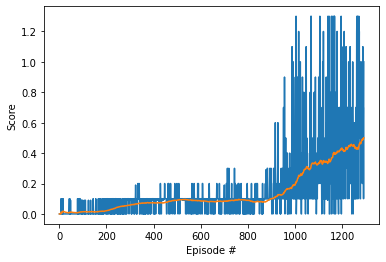

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.plot(np.arange(1, len(moving_average)+1), moving_average)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()